# <b>作業要求</b>
### 1. 延用上週爬取的股價資料
### 2. 計算技術指標（SMA、RSI、MACD）
### 3. 可視化 K 線圖
### 4. 使用技術指標結合機器學習（線性回歸、決策樹、隨機森林）預測股價漲跌。技術指標作為特徵來預測第 n 天的股價

# <b>取得股價資料</b>

In [4]:
!pip install yfinance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 33.8 MB/s eta 0:00:0000:0100:01
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 4.7 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.6-cp310-cp310-linux_x86_64.whl size=293632 sha256=b3327eb9bfbd28864fb00138a784cf8152586bbc5669e07e8b166ddda6b4f95c
  Stored in directory: /root/.cache/pip/wheels/4b/b9/b0/83d6e258e8f963f5ff111a2cd8c483ca59372a86e6a2535212
Successfully built peewee


In [5]:
import yfinance as yf # yahoo finance 套件
import pandas as pd # 結構化資料處理套件
import datetime as dt # 時間套件

In [6]:
# 輸入股票代號
stock_id = "8299.TWO"
# stock_id = "2357.tw"
# stock_id = "AAPL"
# stock_id = "NVDA"

'''今天往前算幾天'''
# 資料結束時間
#end = dt.date.today()
# output : 2024-09-30
end = dt.date(2024, 1, 16)
# 抓取半年資料（現在-過去180天）
start = end - dt.timedelta(days=350)

'''抓取特定時間'''
# start = dt.datetime(2024, 1, 1)  # 指定的開始日期
# end = dt.datetime(2024, 6, 30)    # 指定的結束日期


# 參數1: 股票代號, 參數2: 開始時間, 參數3: 結束時間
df = yf.download(stock_id, start=start, end=end).reset_index()

df

[*********************100%***********************]  1 of 1 completed


,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-31,364.0,376.5,361.0,371.0,358.726501,2022000
1,2023-02-01,369.5,372.0,365.0,368.0,355.825714,1099000
2,2023-02-02,370.0,373.5,369.0,369.0,356.792633,971000
3,2023-02-03,370.5,371.5,364.0,368.0,355.825714,824000
4,2023-02-06,368.5,368.5,358.5,364.0,351.958069,1074000
...,...,...,...,...,...,...,...
232,2024-01-09,503.0,505.0,491.0,495.0,488.007568,967000
233,2024-01-10,495.0,496.0,491.0,494.0,487.021698,1048000
234,2024-01-11,499.0,499.0,480.0,489.0,482.092316,2493000
235,2024-01-12,488.0,489.5,481.0,482.0,475.191223,1476000


# <b>1. 技術指標的計算</b>
移動動平均線（MA）、相對強弱指數（RSI）、平滑異同移動平均線（MACD）


## 1.1 計算簡單移動平均線（EMA）

In [7]:
# 計算3日 EMA
df['3_EMA'] = df['Close'].ewm(span=3, adjust=False).mean()

# 計算6日 EMA
df['6_EMA'] = df['Close'].ewm(span=6, adjust=False).mean()

# 計算9日 EMA
df['9_EMA'] = df['Close'].ewm(span=9, adjust=False).mean()

# 列印最後筆數
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA
232,2024-01-09,503.0,505.0,491.0,495.0,488.007568,967000,497.086951,500.959109,503.995136
233,2024-01-10,495.0,496.0,491.0,494.0,487.021698,1048000,495.543476,498.970792,501.996109
234,2024-01-11,499.0,499.0,480.0,489.0,482.092316,2493000,492.271738,496.121995,499.396887
235,2024-01-12,488.0,489.5,481.0,482.0,475.191223,1476000,487.135869,492.087139,495.917510
236,2024-01-15,488.0,527.0,487.5,516.0,508.710907,4496376,501.567934,498.919385,499.934008


## 1.2 計算布林通道(BOLL)

In [8]:
# 計算中線（SMA），這裡使用6日移動平均線作為布林通道的中線
df['Middle Band'] = df['Close'].rolling(window=6).mean()

# 計算標準差
df['STD'] = df['Close'].rolling(window=6).std()

# 計算上軌：中線 + 2倍標準差
df['Upper Band'] = df['Middle Band'] + (df['STD'] * 2)

# 計算下軌：中線 - 2倍標準差
df['Lower Band'] = df['Middle Band'] - (df['STD'] * 2)

# 顯示最後幾行的數據
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,Middle Band,STD,Upper Band,Lower Band
232,2024-01-09,503.0,505.0,491.0,495.0,488.007568,967000,497.086951,500.959109,503.995136,500.416667,6.836788,514.090242,486.743091
233,2024-01-10,495.0,496.0,491.0,494.0,487.021698,1048000,495.543476,498.970792,501.996109,497.083333,2.177537,501.438407,492.728260
234,2024-01-11,499.0,499.0,480.0,489.0,482.092316,2493000,492.271738,496.121995,499.396887,495.500000,3.794733,503.089466,487.910534
235,2024-01-12,488.0,489.5,481.0,482.0,475.191223,1476000,487.135869,492.087139,495.917510,492.750000,6.322579,505.395157,480.104843
236,2024-01-15,488.0,527.0,487.5,516.0,508.710907,4496376,501.567934,498.919385,499.934008,495.500000,11.397368,518.294736,472.705264


## 1.3 計算乖離率(BIAS)

In [9]:
# 計算3天的簡單移動平均線（SMA），並將其存儲在 'SMA_3' 列中
df['SMA_3'] = df['Close'].rolling(window=3).mean()

# 計算6天的簡單移動平均線（SMA），並將其存儲在 'SMA_6' 列中
df['SMA_6'] = df['Close'].rolling(window=6).mean()

# 計算3天的乖離率（BIAS_8）
df['BIAS_3'] = (df['Close'] - df['SMA_3']) / df['SMA_3'] * 100

# 計算6天的乖離率（BIAS_13）
df['BIAS_6'] = (df['Close'] - df['SMA_6']) / df['SMA_6'] * 100

# 顯示DataFrame的最後幾行數據
df.tail()


,Date,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,Middle Band,STD,Upper Band,Lower Band,SMA_3,SMA_6,BIAS_3,BIAS_6
232,2024-01-09,503.0,505.0,491.0,495.0,488.007568,967000,497.086951,500.959109,503.995136,500.416667,6.836788,514.090242,486.743091,497.166667,500.416667,-0.435803,-1.082431
233,2024-01-10,495.0,496.0,491.0,494.0,487.021698,1048000,495.543476,498.970792,501.996109,497.083333,2.177537,501.438407,492.728260,495.333333,497.083333,-0.269179,-0.620285
234,2024-01-11,499.0,499.0,480.0,489.0,482.092316,2493000,492.271738,496.121995,499.396887,495.500000,3.794733,503.089466,487.910534,492.666667,495.500000,-0.744249,-1.311806
235,2024-01-12,488.0,489.5,481.0,482.0,475.191223,1476000,487.135869,492.087139,495.917510,492.750000,6.322579,505.395157,480.104843,488.333333,492.750000,-1.296928,-2.181634
236,2024-01-15,488.0,527.0,487.5,516.0,508.710907,4496376,501.567934,498.919385,499.934008,495.500000,11.397368,518.294736,472.705264,495.666667,495.500000,4.102219,4.137235


# <b>2. 資料可視化</b>
K 線型態的捕捉

## 2.1 可視化收盤價折線圖

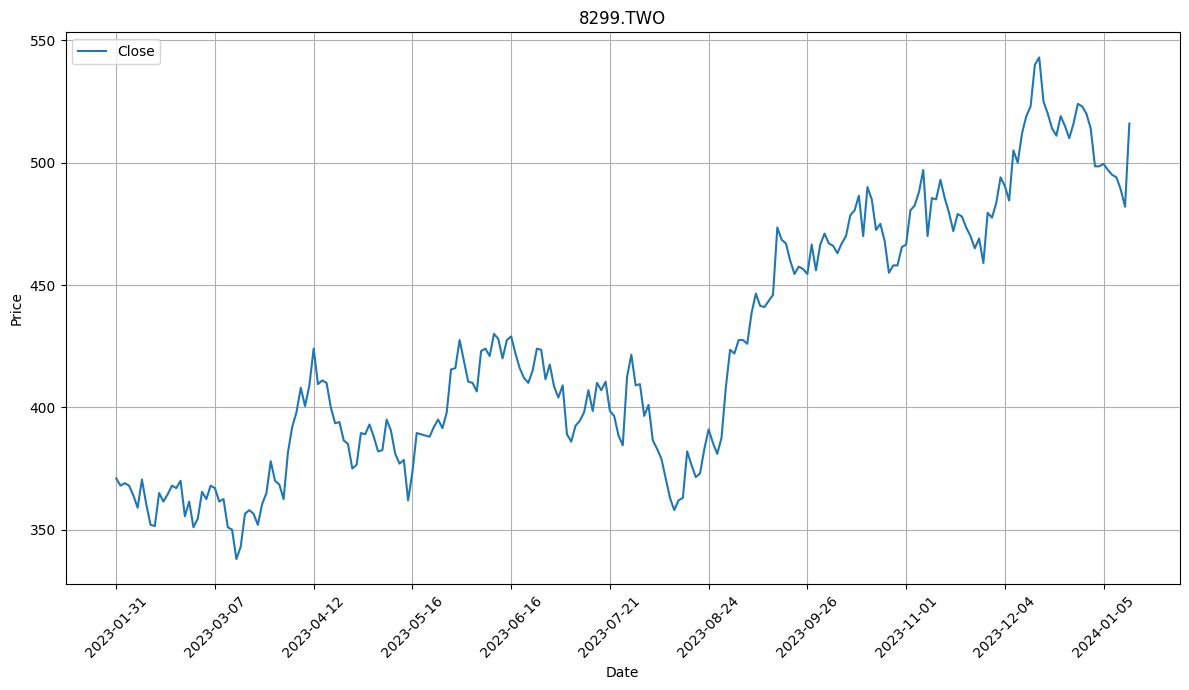

In [10]:
import matplotlib.pyplot as plt

# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Close'], label='Close')

# 設定 x 軸的時間
num = 10
date = df["Date"].dt.strftime('%Y-%m-%d')
plt.xticks(date[::len(date)//num].index,  # 設定在 x 軸上顯示標籤的位置（索引），這些位置間隔為 len(date)//num
           date[::len(date)//num],  # 設定顯示在 x 軸上的日期標籤，數量為 num，間隔為 len(date)//num
           rotation = 45) # 讓日期標籤旋轉 45 度，以避免標籤之間重疊，提高可讀性

# 設定圖表的標題，x 軸和 y 軸的標籤
plt.title(f'{stock_id}')   # 將股票代號設為圖標
plt.xlabel('Date')         # x 軸標籤
plt.ylabel('Price')  # y 軸標籤
plt.legend(loc='upper left') # 在左上角顯示圖例
plt.grid(True) # 在圖上顯示網格
plt.tight_layout()  # 自動調整圖表中的間距，避免元素之間的重疊

# 顯示圖表
plt.show()

## 2.2 加入技術指標

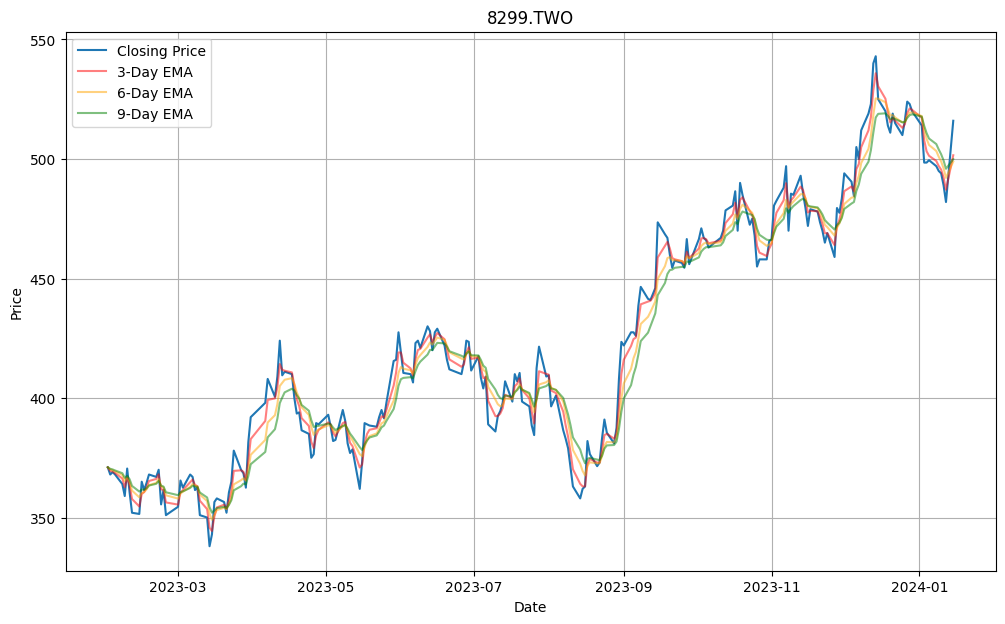

In [11]:
# 畫布尺寸大小設定
plt.figure(figsize=(12, 7))

# 設定要繪製的資料欄位
plt.plot(df['Date'], df['Close'], label='Closing Price')

# 3 天的 EMA
plt.plot(df['Date'], df['3_EMA'], label='3-Day EMA', color='red', alpha=.5)

# 6 天的 EMA
plt.plot(df['Date'], df['6_EMA'], label='6-Day EMA', color='orange', alpha=.5)

# 9 天的 EMA
plt.plot(df['Date'], df['9_EMA'], label='9-Day EMA', color='green', alpha=.5)

# 將股票代號設為圖標
plt.title(f'{stock_id}')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)

plt.show()

## 2.3 K 線

In [12]:
!pip install mplfinance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 2.2 MB/s eta 0:00:00


In [13]:
# 將原始的 dataframe 再建立一個出來
kplot_df = df.set_index('Date')
kplot_df['2024-8-01':'2024-09-18'].tail()

,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,Middle Band,STD,Upper Band,Lower Band,SMA_3,SMA_6,BIAS_3,BIAS_6
Date,,,,,,,,,,,,,,,,,


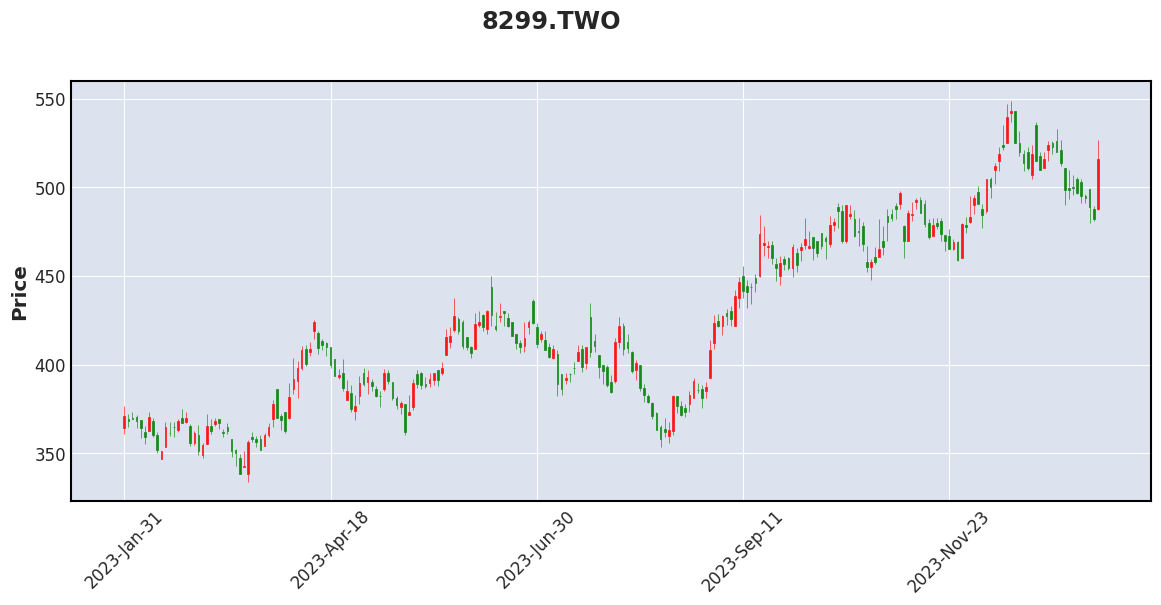

In [14]:
import mplfinance as mpf
# 設置繪圖風格
my_color = mpf.make_marketcolors(up='r', down='g', inherit=True)
my_style = mpf.make_mpf_style(base_mpf_style='default',
                marketcolors=my_color)

# 使用 mplfinance 繪製 K 線圖
mpf.plot(kplot_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(15, 6))

## 2.4 捕捉 Hammer 型態

錘形線（Hammer）

<img src="https://drive.google.com/uc?id=1M5t0g5kKCm2xfzRaFHfKt_CT41XSRjgb" alt="drawing" width="600"/>

In [15]:
# 計算 K 線長度 = abs(收盤-開盤)
df['body_length'] = abs(df['Close'] - df['Open'])

# 計算下影線長度 = abs(最高-最小)
df['lower_shadow'] = abs(df['Low'] - df[['Open', 'Close']].min(axis=1))

# 計算上影線長度 = abs(最高-最小)
df['upper_shadow'] = abs(df['High'] - df[['Open', 'Close']].max(axis=1))

# 定義 Hammer 型態的條件
hammer_condition = (
    (df['lower_shadow'] > 1.5* df['body_length']) &  # 下影線長於實體的1.5倍
    (df['upper_shadow'] < df['body_length'] *0.3) &  # 上影線很短
    (df['body_length'] < (df['High'] - df['Low']) * 0.5)  # 實體相對較小
)

# 提取 Hammer 型態
hammer_df = df[hammer_condition]
hammer_df.set_index('Date', inplace=True)

hammer_df

,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,Middle Band,STD,Upper Band,Lower Band,SMA_3,SMA_6,BIAS_3,BIAS_6,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,
2023-03-07,369.0,369.5,363.5,367.0,354.858795,596000,365.869424,364.030571,363.299619,361.416667,7.052777,375.522221,347.311112,365.833333,361.416667,0.318907,1.544847,2.0,3.5,0.5
2023-03-13,352.0,352.5,343.0,350.0,338.421204,1757000,353.523089,356.875930,358.385124,360.000000,7.778175,375.556349,344.443651,354.500000,360.000000,-1.269394,-2.777778,2.0,7.0,0.5
2023-06-16,430.0,430.0,422.0,429.0,414.807709,1169000,427.204848,425.298066,423.074225,425.916667,4.294376,434.505419,417.327914,425.500000,425.916667,0.822562,0.723929,1.0,7.0,0.0
2023-07-24,400.0,400.0,389.0,396.5,387.514099,1842000,399.935469,401.596555,402.118919,403.500000,6.363961,416.227922,390.772078,401.833333,403.500000,-1.327250,-1.734820,3.5,7.5,0.0
2023-11-22,473.0,473.0,464.0,470.0,459.348389,1700000,472.913513,475.507431,476.794996,475.333333,4.020779,483.374892,467.291775,473.833333,475.333333,-0.809005,-1.122020,3.0,6.0,0.0


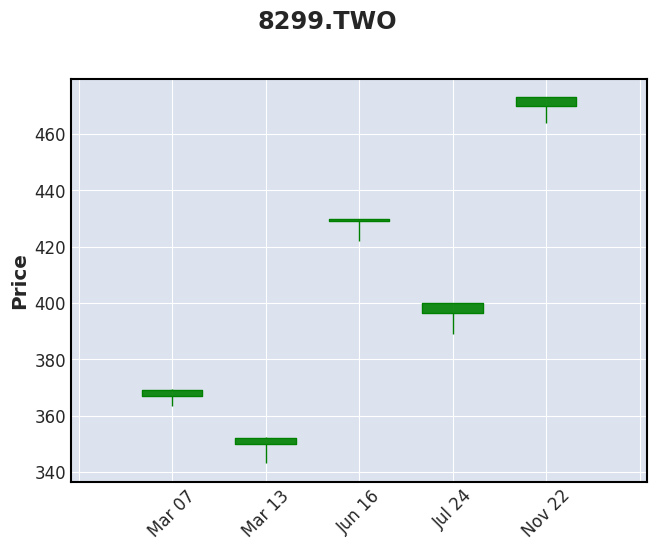

In [16]:
mpf.plot(hammer_df, type='candle', style=my_style, title=f'{stock_id}')

## 2.5 捕捉 Doji 型態

十字線（Doji）

<img src="https://drive.google.com/uc?id=1BDfcn8ZmMVgl0Xlku7mSD338WHeffrgc" alt="drawing" width="600"/>

In [17]:
# 計算 K 線長度
df['body_length'] = abs(df['Close'] - df['Open'])

# 定義Doji型態的條件
# 一般來說，body 長度 如果 小於等於 (最高價-最低價) * 0.1
doji_condition = (
    df['body_length'] <= (df['High'] - df['Low']) * 0.1  # 中間區域非常小
)

# 提取Doji形态
doji_df = df[doji_condition]
doji_df.set_index('Date', inplace=True)

doji_df

,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,Middle Band,STD,Upper Band,Lower Band,SMA_3,SMA_6,BIAS_3,BIAS_6,body_length,lower_shadow,upper_shadow
Date,,,,,,,,,,,,,,,,,,,,
2023-02-15,361.5,367.5,359.5,361.5,349.540741,888000,360.658691,360.672381,361.663950,360.166667,7.400450,374.967568,345.365766,359.333333,360.166667,0.602968,0.370199,0.0,2.0,6.0
2023-02-16,364.5,367.5,359.0,364.5,352.441498,607000,362.579346,361.765986,362.231160,359.166667,5.997222,371.161110,347.172224,363.666667,359.166667,0.229148,1.484919,0.0,5.5,3.0
2023-05-05,382.5,385.0,376.0,382.5,369.846039,854000,383.977748,385.425778,386.605039,387.333333,4.285635,395.904603,378.762063,384.166667,387.333333,-0.433839,-1.247849,0.0,6.5,2.5
2023-06-15,427.0,434.5,424.0,427.5,413.357300,2094000,425.409696,423.817293,421.592782,425.083333,4.054833,433.192998,416.973668,425.166667,425.083333,0.548804,0.568516,0.5,3.0,7.0
2023-07-12,394.5,395.0,390.0,394.5,385.559448,878000,393.479999,396.572309,399.964876,395.833333,8.903183,413.639699,378.026967,391.000000,395.833333,0.895141,-0.336842,0.0,4.5,0.5
2023-07-13,398.0,401.5,394.5,398.0,388.980133,1630000,395.739999,396.980221,399.571901,394.833333,8.103497,411.040328,378.626339,395.000000,394.833333,0.759494,0.802026,0.0,3.5,3.5
2023-08-25,385.5,389.5,384.0,385.5,376.763428,965000,385.000201,381.610323,380.179485,380.083333,7.664311,395.411956,364.754711,386.500000,380.083333,-0.258732,1.425126,0.0,1.5,4.0
2023-09-13,443.5,446.0,434.0,443.5,433.448944,1647000,442.088013,438.134985,432.761974,439.500000,7.134424,453.768847,425.231153,442.000000,439.500000,0.339367,0.910125,0.0,9.5,2.5
2023-09-18,467.5,478.0,461.0,468.5,457.882385,2949000,463.636002,455.174557,448.122131,452.333333,14.651507,481.636348,423.030319,462.666667,452.333333,1.260807,3.574060,1.0,6.5,9.5


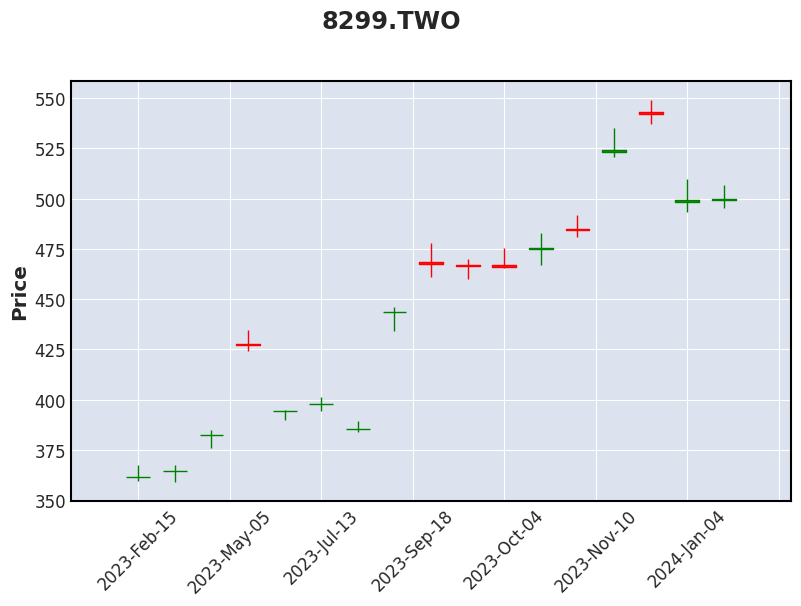

In [18]:
mpf.plot(doji_df, type='candle', style=my_style, title=f'{stock_id}', figsize=(10, 6))

# <b>3. 機器學習預測股價漲跌</b>
技術指標當特徵，用線性回歸、決策樹、隨機森林預測股價漲跌

## 3.1 資料前處理

In [19]:
import numpy as np  # 引入 numpy，用於數據處理和數值運算
from sklearn.model_selection import train_test_split  # 引入 train_test_split，用於將數據集拆分為訓練集和測試集
from sklearn.metrics import mean_squared_error  # 引入 mean_squared_error 用於評估模型性能

In [20]:
# 標籤生成: 預測未來1天的價格，這裡以2023-02-07的技術指標 預測隔天的收盤價
n = 1
df['Future_Price'] = df['Close'].shift(-n)

# 去除缺失值
df.dropna(inplace=True)

# 使用特徵
X = df[['Volume','3_EMA','6_EMA','Upper Band','BIAS_3']]

# 標籤（未來價格）
y = df['Future_Price']

X.shape, y.shape

((231, 5), (231,))

In [26]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,3_EMA,6_EMA,9_EMA,...,Upper Band,Lower Band,SMA_3,SMA_6,BIAS_3,BIAS_6,body_length,lower_shadow,upper_shadow,Future_Price
5,2023-02-07,362.0,365.5,355.0,359.0,347.123474,1665000,362.656250,365.274171,366.645440,...,375.148699,357.851301,363.666667,366.500000,-1.283226,-2.046385,3.0,4.0,3.5,370.5
6,2023-02-08,362.5,373.0,362.5,370.5,358.243011,2032000,366.578125,366.767265,367.416352,...,374.864546,357.968787,364.500000,366.416667,1.646091,1.114396,8.0,0.0,2.5,360.5
7,2023-02-09,368.0,370.0,359.0,360.5,348.573822,1735000,363.539062,364.976618,366.033082,...,374.646470,355.686864,363.333333,365.166667,-0.779817,-1.277955,7.5,1.5,2.0,352.0
8,2023-02-10,360.0,362.0,350.0,352.0,340.355042,2101000,357.769531,361.269013,363.226465,...,375.684987,348.981679,361.000000,362.333333,-2.493075,-2.851886,8.0,2.0,2.0,351.5
9,2023-02-13,346.5,351.5,346.5,351.5,339.871582,887000,354.634766,358.477866,360.881172,...,374.080459,345.086207,354.666667,359.583333,-0.892857,-2.247972,5.0,0.0,0.0,365.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,2024-01-08,505.0,506.0,496.0,497.0,489.979309,1035000,499.173902,503.342753,506.243920,...,524.254802,484.911865,498.333333,504.583333,-0.267559,-1.502890,8.0,1.0,1.0,495.0
232,2024-01-09,503.0,505.0,491.0,495.0,488.007568,967000,497.086951,500.959109,503.995136,...,514.090242,486.743091,497.166667,500.416667,-0.435803,-1.082431,8.0,4.0,2.0,494.0
233,2024-01-10,495.0,496.0,491.0,494.0,487.021698,1048000,495.543476,498.970792,501.996109,...,501.438407,492.728260,495.333333,497.083333,-0.269179,-0.620285,1.0,3.0,1.0,489.0
234,2024-01-11,499.0,499.0,480.0,489.0,482.092316,2493000,492.271738,496.121995,499.396887,...,503.089466,487.910534,492.666667,495.500000,-0.744249,-1.311806,10.0,9.0,0.0,482.0


In [27]:
# 將數據集 X 和標籤 y 拆分為訓練集和測試集
# test_size=0.1 表示測試集佔全部數據的 10% --> 90% 的資料作為訓練，10% 的資料作為測試
# shuffle=False 表示在拆分數據時不打亂原始數據的順序
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# 查看拆分後訓練集和測試集的形狀
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((184, 5), (47, 5), (184,), (47,))

## 3.2 線性回歸（Linear Regression）

In [28]:
# 引入線性回歸模型
from sklearn.linear_model import LinearRegression

# 建立並訓練線性回歸模型
model = LinearRegression()
model.fit(X_train, y_train)

# 預測
y_pred = model.predict(X_test)

# 評估
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"線性回歸模型RMSE: {rmse:.2f}")

# 使用模型進行未來價格走勢預測
LR_future_pred = model.predict(X[-1:])  # 使用最新的數據進行預測
print(f"線性回歸模型預測未來{n}天的價格: {LR_future_pred[0]:.2f}")

線性回歸模型RMSE: 9.61
線性回歸模型預測未來1天的價格: 482.58


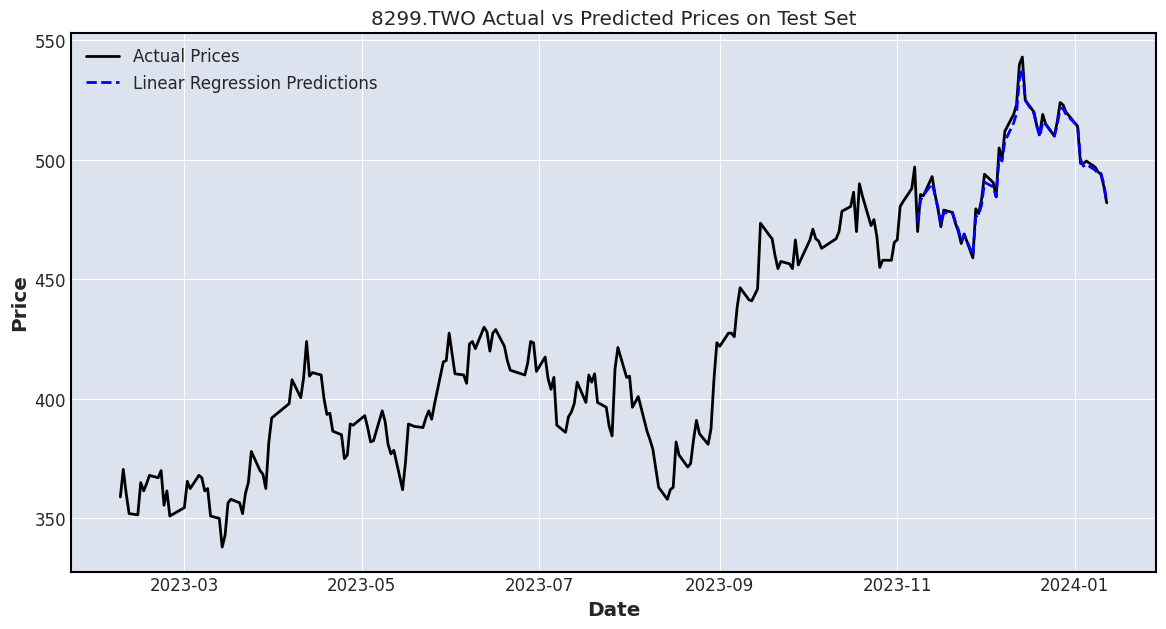

In [29]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.2 XGBOOST

In [30]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_percentage_error
# 設定 XGBoost 參數以促進過擬合
params = {
    'objective': 'reg:squarederror',  # 回歸問題
    'max_depth': 2,                   # 增加樹的深度
    'learning_rate': 1.1,             # 較小的學習率
    'lambda': 2,                     # 不使用 L2 正則化
    'alpha': 2                # 不使用 L1 正則化
}

# 建立 DMatrix
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

# 訓練模型
model = xgb.train(params, dtrain)

# 預測
XG_pred = model.predict(dtest)

# 計算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, XG_pred))
print(f"XGBoost 模型的 RMSE: {rmse:.2f}")

XGBoost 模型的 RMSE: 32.64


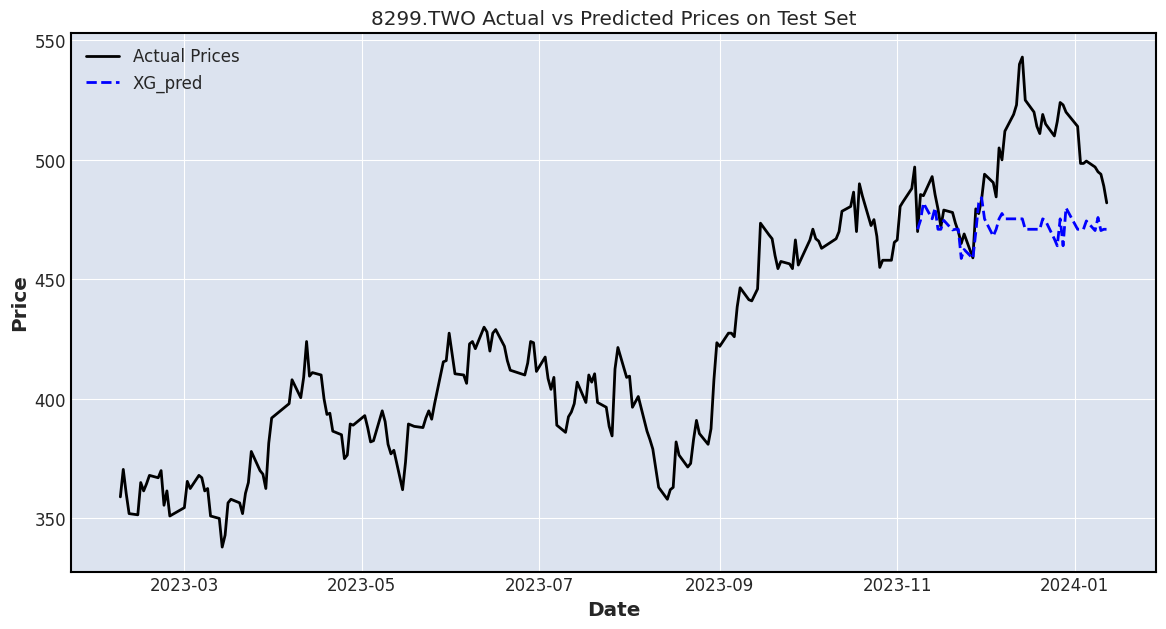

In [31]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], XG_pred, label='XG_pred', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

## 3.3 AdaBoost

In [56]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
import numpy as np

# 設定 AdaBoost 模型，使用Ridge回歸作為基學習器
base_model = Ridge()

# 建立 AdaBoost 模型
model = AdaBoostRegressor(estimator=base_model,)

# 訓練模型
model.fit(X_train, y_train)

# 預測
Ada_pred = model.predict(X_test)

# 計算 RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"AdaBoost 模型的 RMSE: {rmse:.2f}")


AdaBoost 模型的 RMSE: 9.61


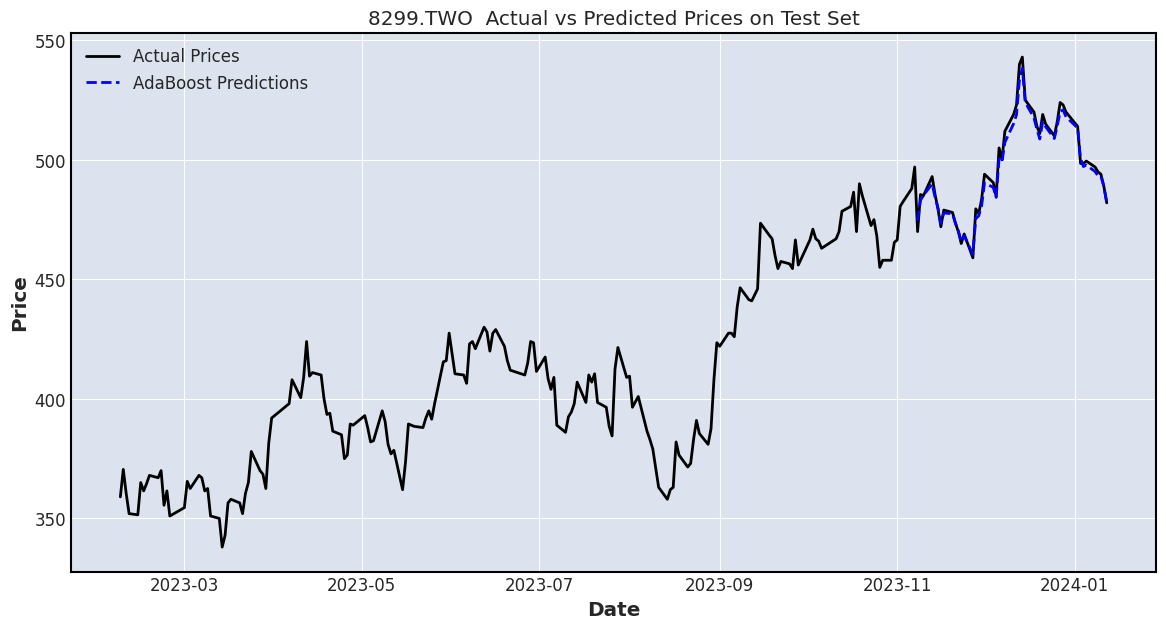

In [33]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], Ada_pred, label='AdaBoost Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

#三種模型集成(LR、XGBoost、AdaBoost)

In [57]:
weights = [0.45, 0.1, 0.45]  # 對應於 LR、XG 和 Ada 的權重
ensemble_pred = (weights[0] * LR_future_pred + weights[1] * XG_pred + weights[2] * Ada_pred) / sum(weights)

# 如果需要將預測結果四捨五入或轉換為其他格式，您可以這樣做
ensemble_pred = np.round(ensemble_pred, 2)
rmse = np.sqrt(mean_squared_error(y_test, ensemble_pred))
print(f"Ensemble 模型的 RMSE: {rmse:.2f}")

Ensemble 模型的 RMSE: 16.95


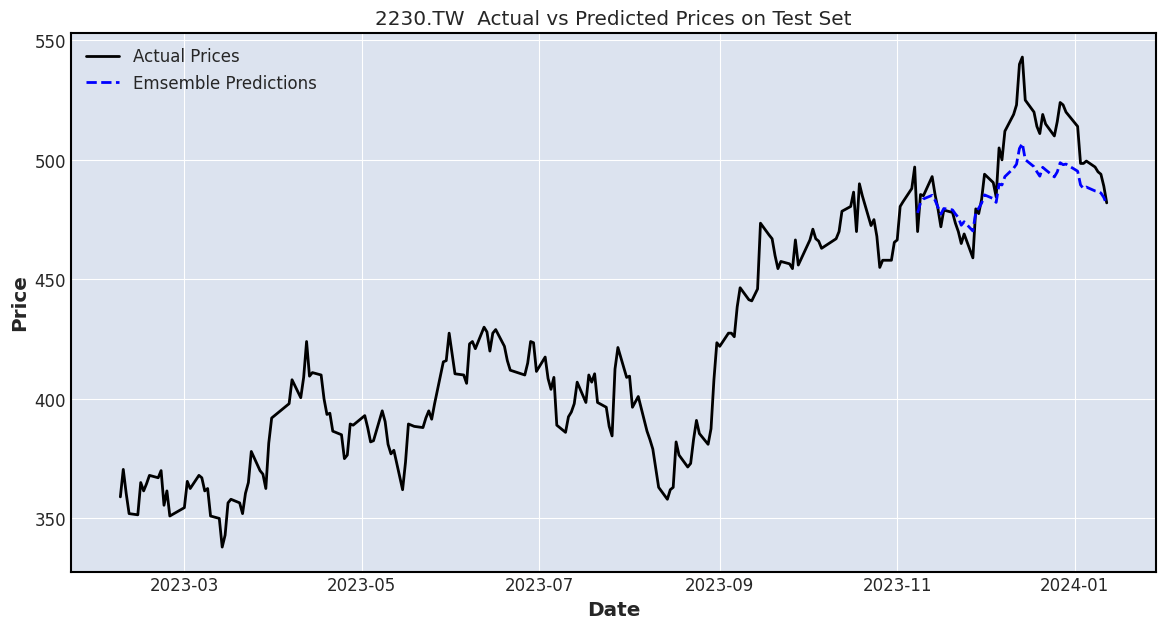

In [35]:
# 畫出測試集的實際價格與預測價格走勢圖
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)
plt.plot(df['Date'][-len(y_test):], ensemble_pred, label='Emsemble Predictions', linestyle='--', color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('2230.TW  Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)
plt.show()

# 所有模型在預測test data的表現

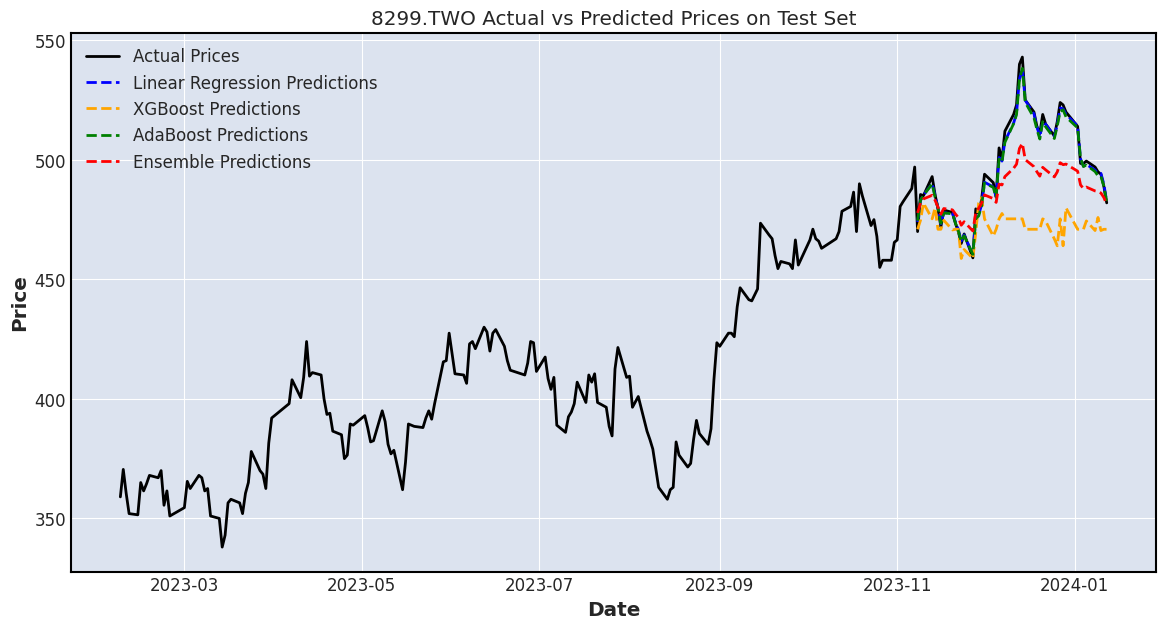

In [36]:
plt.figure(figsize=(14, 7))

# 畫出實際價格
plt.plot(df['Date'], df['Close'], label='Actual Prices', color='black', linewidth=2)

# 畫出線性回歸的預測價格
plt.plot(df['Date'][-len(y_test):], y_pred, label='Linear Regression Predictions', linestyle='--', color='blue')

# 畫出 XGBoost 的預測價格
plt.plot(df['Date'][-len(y_test):], XG_pred, label='XGBoost Predictions', linestyle='--', color='orange')

# 畫出 AdaBoost 的預測價格
plt.plot(df['Date'][-len(y_test):], Ada_pred, label='AdaBoost Predictions', linestyle='--', color='green')

# 畫出集成預測的價格
plt.plot(df['Date'][-len(y_test):], ensemble_pred, label='Ensemble Predictions', linestyle='--', color='red')

# 設定標籤和標題
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('8299.TWO Actual vs Predicted Prices on Test Set')
plt.legend()
plt.grid(True)

# 顯示圖形
plt.show()

# 補充：在 Colab 上使用中文字體

In [ ]:
# # Colab 進行matplotlib繪圖時顯示繁體中文
# # 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
# !wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download



In [ ]:
import matplotlib

# 改style要在改font之前
# plt.style.use('seaborn')

matplotlib.font_manager.fontManager.addfont('/kaggle/input/zh-tw-font-tstc/TaipeiSansTCBeta-Regular.ttf')
matplotlib.rc('font', family='Taipei Sans TC Beta')

In [ ]:
# 繪製範例圖表
plt.title("這是一個範例標題")
plt.show()

# Pandas Shift

In [ ]:
temp_df = pd.DataFrame({
    'Date': ['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06'],
    'Close': [111, 222, 333, 444, 555, 666]
})
temp_df

In [ ]:
sample_df = pd.DataFrame({
    'Date': ['2024-02-01', '2024-02-02', '2024-02-03', '2024-02-04', '2024-02-05', '2024-02-06'],
    'SMA': ['SMA_1', 'SMA_2', 'SMA_3', 'SMA_4', 'SMA_5', 'SMA_6'],
    'RSI': ['RSI_1', 'RSI_2', 'RSI_3', 'RSI_4', 'RSI_5', 'RSI_6'],
    'MACD': ['MACD_1', 'MACD_2', 'MACD_3', 'MACD_4', 'MACD_5', 'MACD_6'],
    'Close': [111, 222, 333, 444, 555, 666]
})
sample_df

In [ ]:
sample_df['Future_Close'] = sample_df['Close'].shift(-1)
sample_df